In [65]:
import pandas as pd

In [66]:
df=pd.read_csv("seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [67]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [68]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [69]:
df["humidity"] = 100 - (df["temp_max"] - df["temp_min"]) * 5
df["humidity"] = df["humidity"].clip(lower=0, upper=100)


In [70]:
df.head(2)

,date,precipitation,temp_max,temp_min,wind,weather,humidity
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,61.0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,61.0


In [71]:
df.describe()

,precipitation,temp_max,temp_min,wind,humidity
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,58.978439
std,6.680194,7.349758,5.023004,1.437825,19.100098
min,0.000000,-1.600000,-7.100000,0.400000,5.500000
25%,0.000000,10.600000,4.400000,2.200000,47.000000
50%,0.000000,15.600000,8.300000,3.000000,61.500000
75%,2.800000,22.200000,12.200000,4.000000,72.500000
max,55.900000,35.600000,18.300000,9.500000,97.000000


In [72]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
humidity         float64
dtype: object

In [73]:
df["date"] = pd.to_datetime(df["date"])

In [74]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
humidity                float64
dtype: object

In [75]:
df["day"] = df["date"].dt.day
df["week"] = df["date"].dt.isocalendar().week.astype(int)   # ISO week number
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["day_of_week"] = df["date"].dt.dayofweek   # 0 = Mondayobject, 6 = Sunday
df["day_name"] = df["date"].dt.day_name()    

In [76]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,humidity,day,week,month,year,day_of_week,day_name
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,61.0,1,52,1,2012,6,Sunday
1,2012-01-02,10.9,10.6,2.8,4.5,rain,61.0,2,1,1,2012,0,Monday
2,2012-01-03,0.8,11.7,7.2,2.3,rain,77.5,3,1,1,2012,1,Tuesday
3,2012-01-04,20.3,12.2,5.6,4.7,rain,67.0,4,1,1,2012,2,Wednesday
4,2012-01-05,1.3,8.9,2.8,6.1,rain,69.5,5,1,1,2012,3,Thursday


In [77]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Convert weather (object → int)
df["weather"] = le.fit_transform(df["weather"].astype(str))

# Show mapping (so you know which int = which weather type)
weather_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Weather Mapping:", weather_mapping)


Weather Mapping: {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}


In [78]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,humidity,day,week,month,year,day_of_week,day_name
0,2012-01-01,0.0,12.8,5.0,4.7,0,61.0,1,52,1,2012,6,Sunday
1,2012-01-02,10.9,10.6,2.8,4.5,2,61.0,2,1,1,2012,0,Monday
2,2012-01-03,0.8,11.7,7.2,2.3,2,77.5,3,1,1,2012,1,Tuesday
3,2012-01-04,20.3,12.2,5.6,4.7,2,67.0,4,1,1,2012,2,Wednesday
4,2012-01-05,1.3,8.9,2.8,6.1,2,69.5,5,1,1,2012,3,Thursday


In [79]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                   int32
humidity                float64
day                       int32
week                      int32
month                     int32
year                      int32
day_of_week               int32
day_name                 object
dtype: object

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

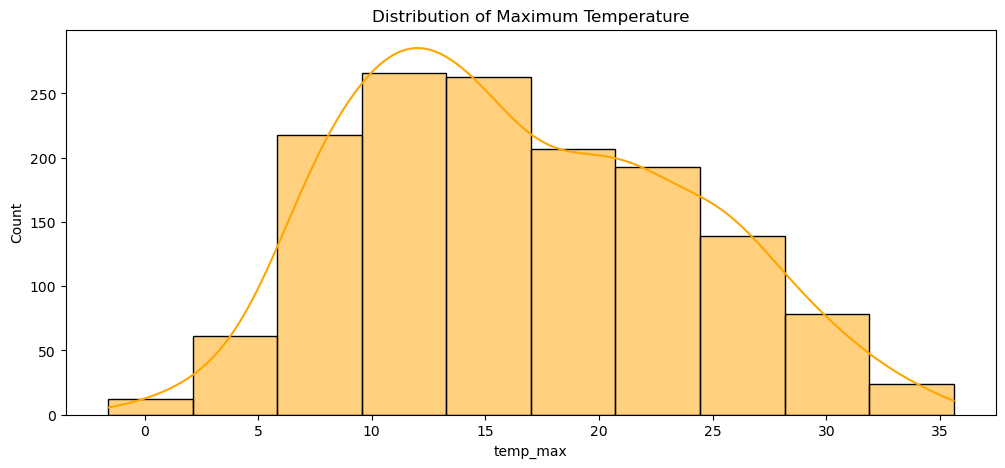

In [81]:
plt.figure(figsize=(12,5))
sns.histplot(df['temp_max'], kde=True, bins=10, color="orange")
plt.title("Distribution of Maximum Temperature")
plt.show()

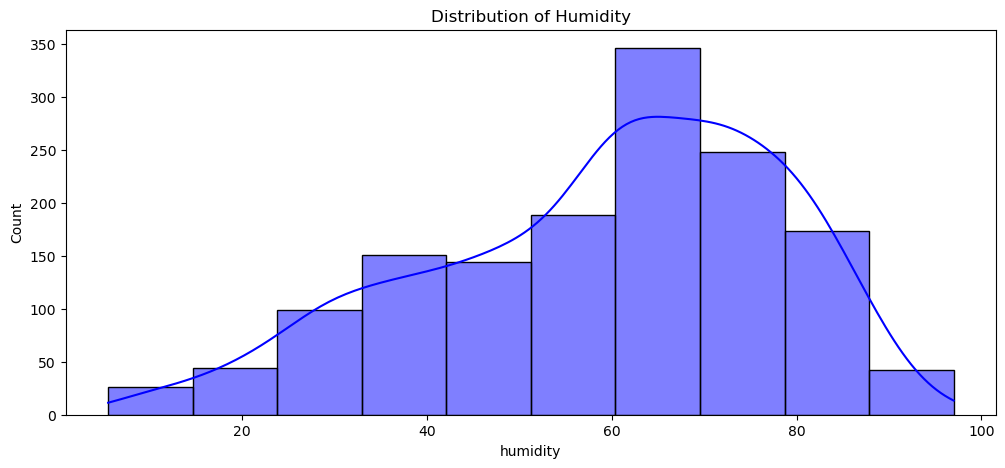

In [82]:
plt.figure(figsize=(12,5))
sns.histplot(df['humidity'], kde=True, bins=10, color="blue")
plt.title("Distribution of Humidity")
plt.show()

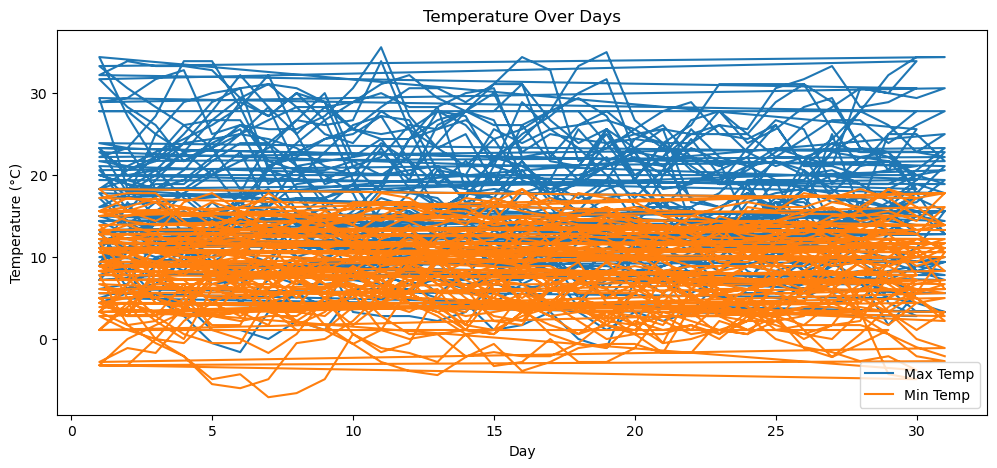

In [83]:
plt.figure(figsize=(12,5))
plt.plot(df['day'], df['temp_max'], label='Max Temp')
plt.plot(df['day'], df['temp_min'], label='Min Temp')
plt.xlabel("Day")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Days")
plt.legend()
plt.show()

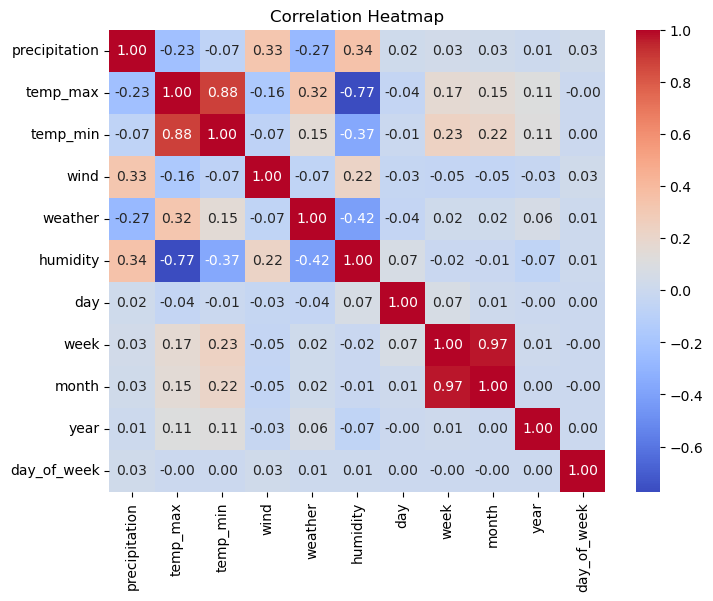

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

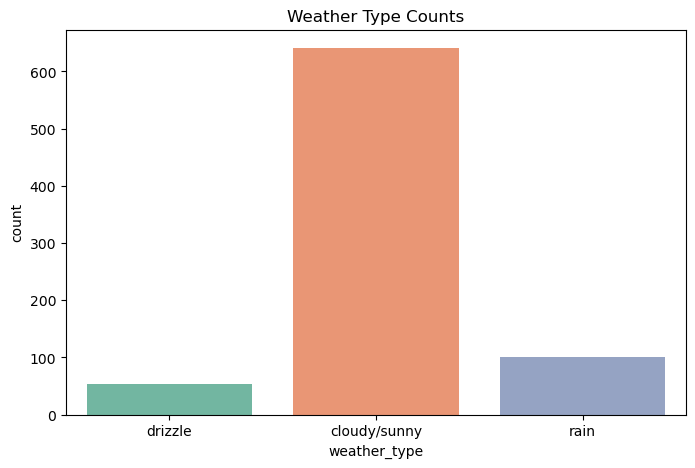

In [85]:
weather_map = {0: "drizzle", 1: "rain", 2: "cloudy/sunny"}
df['weather_type'] = df['weather'].map(weather_map)

plt.figure(figsize=(8,5))
sns.countplot(x='weather_type', data=df, palette="Set2")
plt.title("Weather Type Counts")
plt.show()

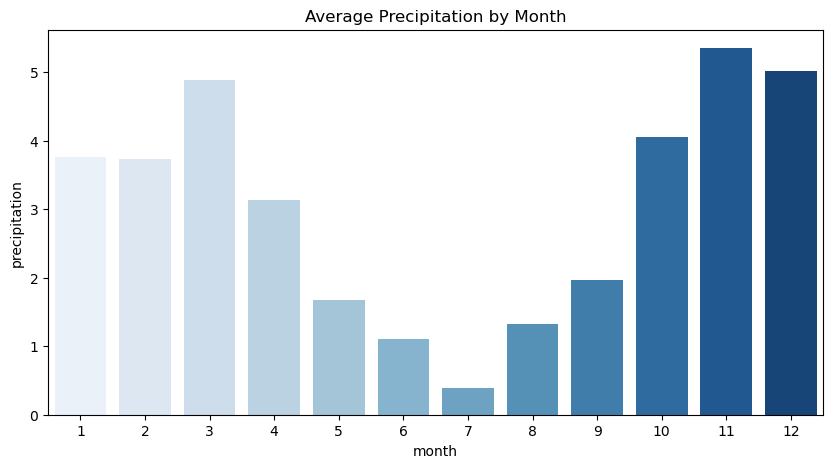

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='precipitation', data=df, ci=None, palette="Blues")
plt.title("Average Precipitation by Month")
plt.show()

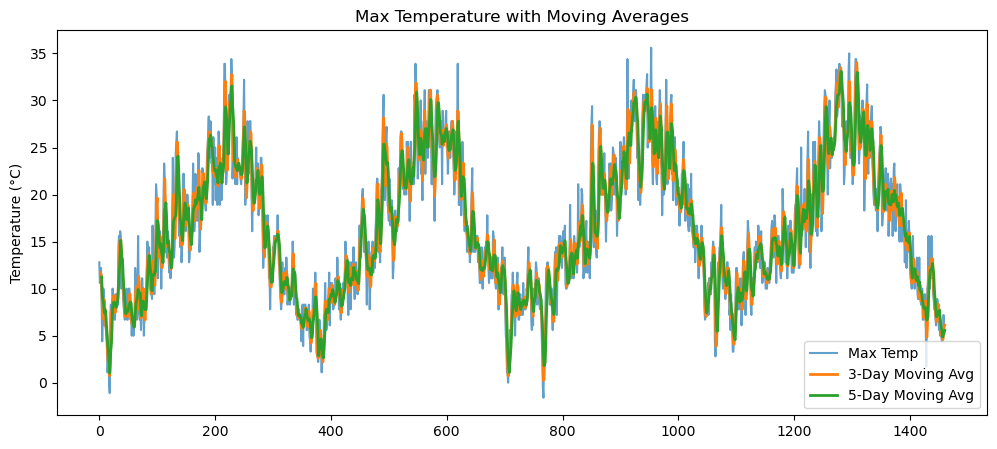

In [87]:
plt.figure(figsize=(12,5))
df['temp_max'].plot(label='Max Temp', alpha=0.7)
df['temp_max'].rolling(window=3).mean().plot(label='3-Day Moving Avg', linewidth=2)
df['temp_max'].rolling(window=5).mean().plot(label='5-Day Moving Avg', linewidth=2)
plt.title("Max Temperature with Moving Averages")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

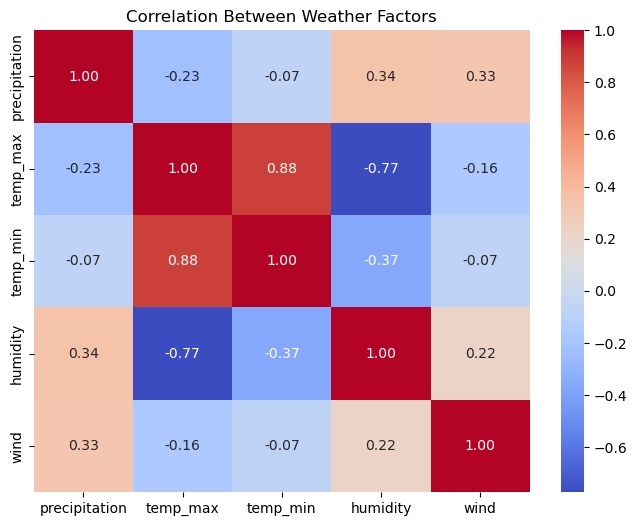

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['precipitation','temp_max','temp_min','humidity','wind']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Weather Factors")
plt.show()

In [89]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,humidity,day,week,month,year,day_of_week,day_name,weather_type
0,2012-01-01,0.0,12.8,5.0,4.7,0,61.0,1,52,1,2012,6,Sunday,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,2,61.0,2,1,1,2012,0,Monday,cloudy/sunny
2,2012-01-03,0.8,11.7,7.2,2.3,2,77.5,3,1,1,2012,1,Tuesday,cloudy/sunny
3,2012-01-04,20.3,12.2,5.6,4.7,2,67.0,4,1,1,2012,2,Wednesday,cloudy/sunny
4,2012-01-05,1.3,8.9,2.8,6.1,2,69.5,5,1,1,2012,3,Thursday,cloudy/sunny


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,humidity,day,week,month,year,day_of_week,day_name,weather_type
0,2012-01-01,0.0,12.8,5.0,4.7,0,61.0,1,52,1,2012,6,Sunday,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,2,61.0,2,1,1,2012,0,Monday,cloudy/sunny
2,2012-01-03,0.8,11.7,7.2,2.3,2,77.5,3,1,1,2012,1,Tuesday,cloudy/sunny
3,2012-01-04,20.3,12.2,5.6,4.7,2,67.0,4,1,1,2012,2,Wednesday,cloudy/sunny
4,2012-01-05,1.3,8.9,2.8,6.1,2,69.5,5,1,1,2012,3,Thursday,cloudy/sunny


In [92]:
df = df.drop(columns=["date"])

In [93]:
from sklearn.preprocessing import StandardScaler

# keep only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

# scale only numeric features
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(numeric_df)

# create dataframe back
df_std = pd.DataFrame(scaled_std, columns=numeric_df.columns)

print(df_std.head())


   precipitation  temp_max  temp_min      wind  humidity
0      -0.453650 -0.495299 -0.644212  1.014980  0.105877
1       1.178598 -0.794731 -1.082347  0.875833  0.105877
2      -0.333852 -0.645015 -0.206077 -0.654780  0.970042
3       2.586224 -0.576962 -0.524720  1.014980  0.420119
4      -0.258978 -1.026111 -1.082347  1.989006  0.551053


In [94]:
df_std.head()

,precipitation,temp_max,temp_min,wind,humidity
0,-0.453650,-0.495299,-0.644212,1.014980,0.105877
1,1.178598,-0.794731,-1.082347,0.875833,0.105877
2,-0.333852,-0.645015,-0.206077,-0.654780,0.970042
3,2.586224,-0.576962,-0.524720,1.014980,0.420119
4,-0.258978,-1.026111,-1.082347,1.989006,0.551053


In [95]:
from sklearn.model_selection import train_test_split


In [96]:
# Target variable
y = df["weather"]   # already encoded into integers

# Features (most important ones)
X = df[["precipitation", "temp_max", "temp_min", "wind", "humidity",
        "day", "month", "year"]]


In [97]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [99]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    random_state=42,
    n_jobs=-1           
)

In [100]:

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [101]:
# Predict on test set
y_pred = rf_model.predict(X_test)

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8395904436860068


In [104]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [105]:
import numpy as np
from datetime import datetime, timedelta

# Mapping class numbers to labels
weather_labels = {
    0: "Cloudy",
    1: "Rainy",
    2: "Snowy",
    3: "Stormy",
    4: "Sunny"
}

# ask user for inputs (only weather-related features, not date/time)
precipitation = float(input("Enter precipitation: "))
temp_max = float(input("Enter maximum temperature: "))
temp_min = float(input("Enter minimum temperature: "))
wind = float(input("Enter wind speed: "))
humidity = float(input("Enter humidity: "))

# start from today's date
today = datetime.today()

# loop for today + next 3 days
for i in range(4):  
    date = today + timedelta(days=i)
    
    day = date.day
    week = date.isocalendar()[1]   # ISO week number
    month = date.month
    year = date.year

    # put into numpy array
    user_input = np.array([[precipitation, temp_max, temp_min, wind, humidity, day, month, year]])

    # make prediction
    prediction = rf_model.predict(user_input)[0]
    probs = rf_model.predict_proba(user_input)[0]

    print(f"\n📅 Date: {date.strftime('%Y-%m-%d')}")
    print(f"Predicted Weather: {prediction} ({weather_labels[prediction]})")
    print("Class probabilities:")
    for weather_class, prob in zip(rf_model.classes_, probs):
        print(f"  {weather_labels[weather_class]}: {prob*100:.1f}%")


Enter precipitation:  3
Enter maximum temperature:  3
Enter minimum temperature:  3
Enter wind speed:  3
Enter humidity:  3



📅 Date: 2025-08-22
Predicted Weather: 2 (Snowy)
Class probabilities:
  Cloudy: 3.0%
  Rainy: 2.5%
  Snowy: 71.5%
  Stormy: 12.0%
  Sunny: 11.0%

📅 Date: 2025-08-23
Predicted Weather: 2 (Snowy)
Class probabilities:
  Cloudy: 3.0%
  Rainy: 2.0%
  Snowy: 72.0%
  Stormy: 12.0%
  Sunny: 11.0%

📅 Date: 2025-08-24
Predicted Weather: 2 (Snowy)
Class probabilities:
  Cloudy: 2.5%
  Rainy: 2.0%
  Snowy: 71.0%
  Stormy: 12.5%
  Sunny: 12.0%

📅 Date: 2025-08-25
Predicted Weather: 2 (Snowy)
Class probabilities:
  Cloudy: 2.5%
  Rainy: 1.5%
  Snowy: 70.5%
  Stormy: 13.0%
  Sunny: 12.5%


In [107]:
df = df.drop(columns=["day_of_week", "day_name"], errors="ignore")


In [ ]:
import streamlit as st
import numpy as np
import random
from sklearn.linear_model import LogisticRegression

# Weather mapping
weather_map = {0: "Cloudy", 1: "Rainy", 2: "Snowy", 3: "Stormy", 4: "Sunny"}

# Dummy trained model (for demo – replace with your trained model)
model = LogisticRegression()
X_dummy = np.random.rand(50, 6)  # 50 samples, 6 features
y_dummy = np.random.randint(0, 5, 50)  # 5 classes
model.fit(X_dummy, y_dummy)

# Streamlit App
st.title("🌦 Weather Prediction App")
st.write("Enter the weather conditions to predict today's and next 3 days' weather.")

# User Inputs
temperature = st.number_input("🌡 Temperature (°C)", -30, 50, 20)
humidity = st.number_input("💧 Humidity (%)", 0, 100, 50)
wind_speed = st.number_input("🌬 Wind Speed (km/h)", 0, 200, 10)
pressure = st.number_input("📊 Pressure (hPa)", 800, 1100, 1013)
cloud_cover = st.number_input("☁ Cloud Cover (%)", 0, 100, 50)
precipitation = st.number_input("🌧 Precipitation (mm)", 0, 500, 5)

# Prediction Button
if st.button("🔮 Predict Weather"):
    user_input = np.array([[temperature, humidity, wind_speed, pressure, cloud_cover, precipitation]])
    
    # Today's prediction
    today_pred = model.predict(user_input)[0]
    today_proba = model.predict_proba(user_input)[0]

    st.subheader("📅 Today's Prediction")
    st.write(f"Predicted Weather: **{today_pred} ({weather_map[today_pred]})**")
    st.write("Class Probabilities:")
    for i, prob in enumerate(today_proba):
        st.write(f"Weather {i} ({weather_map[i]}): {prob*100:.1f}%")

    # Next 3 days prediction (adding small random variation)
    st.subheader("📅 Next 3 Days Forecast")
    for day in range(1, 4):
        varied_input = user_input + np.random.normal(0, 2, size=user_input.shape)  # slight variation
        day_pred = model.predict(varied_input)[0]
        day_proba = model.predict_proba(varied_input)[0]

        st.write(f"\n**Day {day}: Predicted Weather → {day_pred} ({weather_map[day_pred]})**")
        for i, prob in enumerate(day_proba):
            st.write(f"Weather {i} ({weather_map[i]}): {prob*100:.1f}%")
+

In [2]:
import os
print(os.getcwd())


C:\Users\Hp
